<a href="https://colab.research.google.com/github/naveedali786/End-to-End-Full-Machine-Learning-Projects/blob/main/Email_Span_Ham_Detection_Full_End_to_End_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*_igArwmR7Pj_Mu_KUGD1SQ.png" style="max-width: 100%; height: auto;">
</div>
<a id="top"></a>
<div style="text-align: center; background: #ff8c00; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 60px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    🚀 <b style="display: inline-block; text-align: center; max-width: 100%;">Email Detecting Unwanted Messages /spam Using ML</b> 🚀
</div>

###**Introduction:**
Email is essential for communication, but spam emails create problems. We need better ways to detect spam

###**Problem Statement:**
Spam emails, which often contain** unwanted information, disrupt** effective communication and pose **security risks**. Traditional methods struggle to keep up with **evolving spam tactics**. This project aims to use **Python-based text classification** techniques to accurately identify and classify spam emails, evaluating the performance through metrics such as **accuracy, time, and error rate** using algorithms like **NaiveBayes, NaiveBayesMultinomial, and svm.**

### **Objectives:**
The project aims to develop and evaluate **machine learning models** for accurately **classifying spam emails**, using algorithms like Naive Bayes and svm , and compare their performance based on accuracy, time, and error rates. The ultimate goal is to identify the most effective algorithm for **spam detection**.

# **About Data**

+ **Dataset Name:**  *Email Spam Classification Dataset CSV*

+ **Description:**
The dataset for this project is sourced from Simplilearn and contains over 5,000 email records. It includes two columns: Category and Message. The Category column has two unique values, “spam” and “ham,” while the Message column contains common words used in emails.


+ **Dataset:** 🔗 <a href="https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa25FemtldDU4dzlkRUtBb1VFZHhCaFRQN1BDQXxBQ3Jtc0ttRVRJeThsSF9Wbk5qM2xRNHJXLThRelR6T0IyemM1V3VkR2REaVlPdzc1bjZZZWFfbE9zUHlVcTJnbGNzTklBYXJCVUlWQW1aekNUaUJaaGpGU09GWWtqLU1HMVZybWc5YmpNcnhSUDlDNUpVdTVwbw&q=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1bRuM2RJ3CGD5_PtnIr7jVbC5kOJW5o6x%3Fusp%3Dsharing&v=FkF2jhaRJIs"> Email Datsets</a>

# **About Author**
- **Project:** Spam Emails Detection
- **Author:** Muhammad Naveed
- **Code Submission Date:** 14-03-2023
- **Author's Contact Info:**

+ Email: naveedali786aziz@gmail.com

+ Linekedin:https://www.linkedin.com/in/ai-expert/



# **Data Load**

In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns     # For advanced data visualization

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [47]:
df=pd.read_csv('/content/mail_data.csv')

In [48]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#**Data Preprocessing**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [50]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


**Shape of the Dataset**

In [51]:
df.shape

(5572, 2)

**Check Missing values**

In [52]:
df.isnull().sum()

,0
Category,0
Message,0


**Check Duplicate values**

In [53]:
df.duplicated().sum()

415

**Remove Duplicate value**

In [54]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

**Agian Shape of the Dataset**

In [55]:
df.shape

(5157, 2)

# **EDA Analysis**
## **Check the Percentage of Ham and Spam**

In [56]:

df.loc[df['Category'] == 'spam','Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

values = df['Category'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 12.429707194105099
percentage of 1 : 87.5702928058949


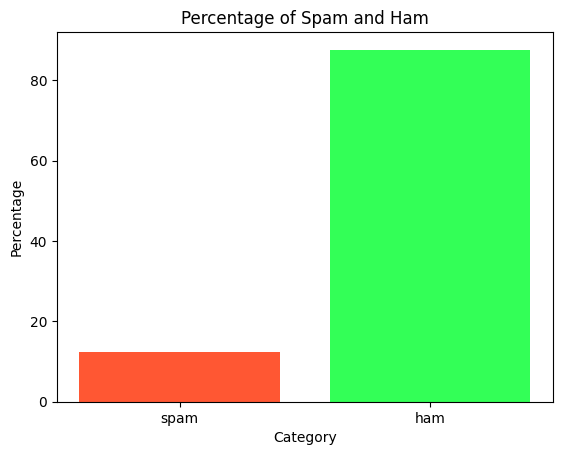

In [57]:
categories = ['spam', 'ham']
percentages = [percentage_0, percentage_1]

# bar plot
fig, ax = plt.subplots()
ax.bar(categories, percentages, color=['#FF5733', '#33FF57'])

ax.set_xlabel('Category')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Spam and Ham')

plt.show()



## **Summary Statistics Ham and span**

In [58]:
#spam
df[df['Category'] == 1].describe()

,Category,Message
count,4516,4516
unique,1,4516
top,1,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [59]:
#ham
df[df['Category'] == 0].describe()

,Category,Message
count,641,641
unique,1,641
top,0,Free entry in 2 a wkly comp to win FA Cup fina...
freq,641,1


## **Data Visualization**

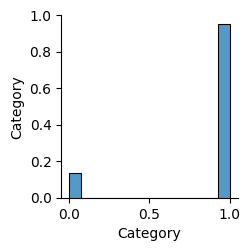

In [60]:

sns.pairplot(df)

<ipython-input-61-327e0959fd94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='Category', y='Count', palette='bright')


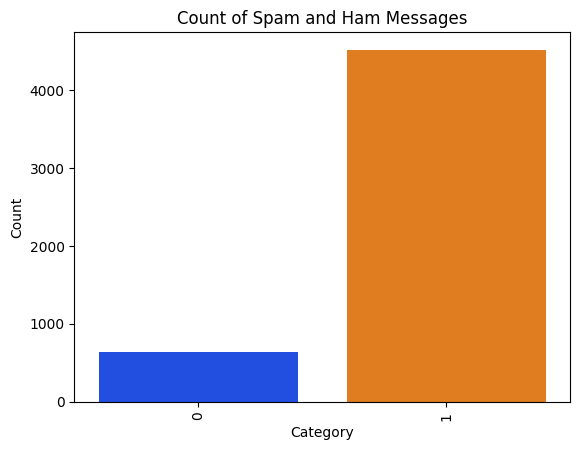

In [61]:
# Count the occurrences of each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Create a bar plot
sns.barplot(data=category_counts, x='Category', y='Count', palette='bright')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Add a title
plt.title('Count of Spam and Ham Messages')

# Show the plot
plt.show()


# **Model Training**
Initially, we train the linear Logistic Regression Model then compare the accuaracy of other model like (Naive Bayes,Decision Tree,Random Forest,SVM ), after comparing the model's accuracy score to suggest the best method/model for email detection for spam.

## **Feature Selection**

In [62]:
X=df['Message']
Y=df['Category']

In [63]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [64]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: object


## **Splitting the Dataset**

In [65]:
X_train,X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 3)

In [66]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(3609,)
(1548,)


In [67]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5157,)
(3609,)
(1548,)


## **Feature Extraction**

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Fit and transform the training data
X_train_features = feature_extraction.fit_transform(X_train)

# Transform the test data
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test to integers
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")


## **Fit the Model**

In [69]:
model=LogisticRegression()


In [71]:
model.fit(X_train_features,Y_train)

LogisticRegression()

## **Model Evaluation**

In [72]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)


In [73]:
print('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 0.9600997506234414


In [74]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [75]:
print('Accuracy on test data:',accuracy_on_test_data)

Accuracy on test data: 0.9489664082687338


## **Model Tesing**

In [76]:
input_Your_Email=['Hi Muhammad Naveed,Refonte Learning provides courses in AI, Data Science, DevOps, and Cloud technologies, focusing on skill advancement and practical applications']
input_data=feature_extraction.transform(input_Your_Email)
prediction=model.predict(input_data)
print(prediction)
if (prediction[0]==1):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Ham mail


## **Compare With Other Model**

In [77]:
!pip install --upgrade scikit-learn


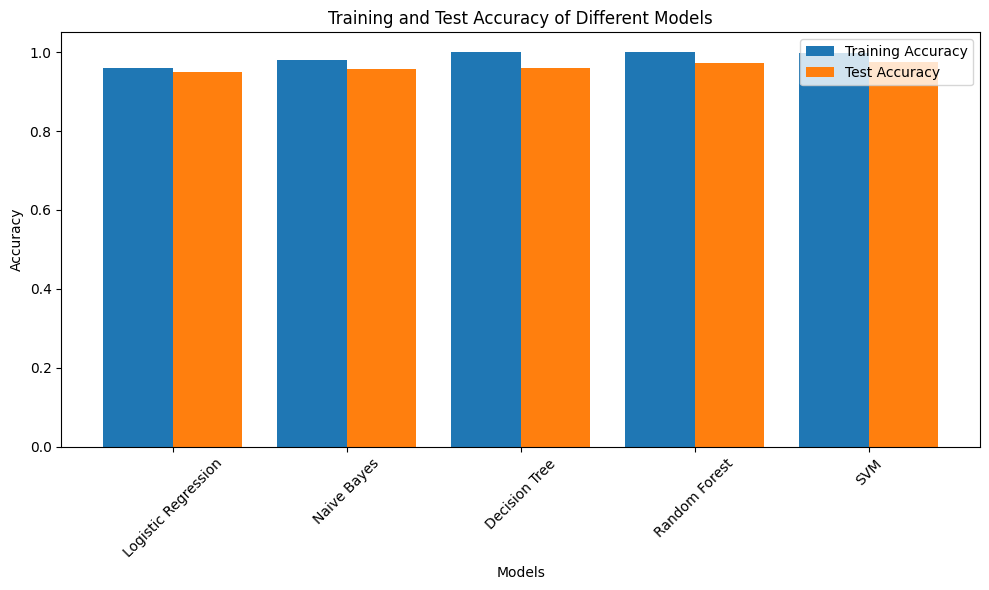

In [78]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Store accuracy scores
training_accuracies = []
test_accuracies = []
model_names = []

# Loop through each model, train it, and evaluate accuracy
for name, model in models.items():
    model.fit(X_train_features, Y_train)

    # Predictions on training data
    prediction_on_training_data = model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
    training_accuracies.append(accuracy_on_training_data)

    # Predictions on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
    test_accuracies.append(accuracy_on_test_data)

    # Store model names
    model_names.append(name)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
x = range(len(models))

# Bar plot for training accuracy
plt.bar(x, training_accuracies, width=0.4, label='Training Accuracy', align='center')

# Bar plot for test accuracy
plt.bar([i + 0.4 for i in x], test_accuracies, width=0.4, label='Test Accuracy', align='center')

# Add model names as x-ticks
plt.xticks([i + 0.2 for i in x], model_names, rotation=45)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of Different Models')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [79]:
# Loop through each model, train it, and evaluate accuracy
for name, model in models.items():
    model.fit(X_train_features, Y_train)

    # Predictions on training data
    prediction_on_training_data = model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
    print(f'Accuracy on training data for {name}:', accuracy_on_training_data)

    # Predictions on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
    print(f'Accuracy on test data for {name}:', accuracy_on_test_data)
    print('-' * 50)


Accuracy on training data for Logistic Regression: 0.9600997506234414
Accuracy on test data for Logistic Regression: 0.9489664082687338
--------------------------------------------------
Accuracy on training data for Naive Bayes: 0.9792186201163757
Accuracy on test data for Naive Bayes: 0.9567183462532299
--------------------------------------------------
Accuracy on training data for Decision Tree: 1.0
Accuracy on test data for Decision Tree: 0.9528423772609819
--------------------------------------------------
Accuracy on training data for Random Forest: 1.0
Accuracy on test data for Random Forest: 0.9683462532299741
--------------------------------------------------
Accuracy on training data for SVM: 0.9980604045441951
Accuracy on test data for SVM: 0.9760981912144703
--------------------------------------------------


#**Conclusion**


  - Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately <span style="background-color: yellow; font-weight: bold;">97%,96% etc</span>.
  - Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
  - Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy scores ranging from <span style="background-color: yellow; font-weight: bold;">94.68%</span> to <span style="background-color: yellow; font-weight: bold;">96.03%</span>.

  The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice.
</span>